## 고객분류 (VIP, DIAMOND, NORMAL)

In [9]:
# 모델 라이브러리 선언
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pit
import pandas as pd

In [1]:
import numpy as np
import pandas as pd
# 모델 라이브러리 선언
from sklearn import svm

## Test/Training 자동 분리
from sklearn.model_selection import train_test_split

# 모델 정확도 라이브러리 선언
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [14]:
#고객 데이터 읽어 들이기-------(1)
csData = pd.read_csv("./dataset/customer.csv")
csData.head()

,deposit,stock,label
0,1400000000,45000000,normal
1,1450000000,72000000,diamond
2,1500000000,61000000,diamond
3,1370000000,56000000,normal
4,1920000000,48000000,diamond


In [15]:
### feature, label 컬럼 설정
featuresCol = ['deposit','stock']
labelCol = ['label']
### feature 데이터, label 데이터 분리
featuresData = csData[featuresCol]
labelData = csData[labelCol]
### train_test_split 함수를 활용해 feature / label 데이터 자동 분리 7:3
feature_train, feature_test, label_train, label_test = \
train_test_split(featuresData, labelData, test_size = 0.3)

In [16]:
len(feature_train)

14000

In [8]:
len(feature_test)

6000

##  모델선언 및 학습

In [17]:
### Define Model
model = svm.SVC()
### Learning (Feature & Label)
model.fit(feature_train, label_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## 예측

In [18]:
## 테스트데이터 Feature만 가지고 예측하기
predict = model.predict(feature_test)
predict

array(['diamond', 'normal', 'diamond', ..., 'diamond', 'vip', 'diamond'],
      dtype=object)

## 데이터 정리

In [19]:
### 데이터프레임으로 변환
predictData = pd.DataFrame(predict)
### 컬럼명 주입
predictData.columns = ["PREDICT"]
predictData.head()

,PREDICT
0,diamond
1,normal
2,diamond
3,normal
4,diamond


In [24]:
featureTestResult = feature_test.reset_index(drop=True)
labelTestResult = label_test.reset_index(drop=True)
### 테스트데이터 + Predict 합치기
finalResultab = pd.concat(
[featureTestResult, labelTestResult, predictData], axis=1)
finalResultab.head(5)

,deposit,stock,label,PREDICT
0,1650000000,58000000,diamond,diamond
1,1350000000,52000000,normal,normal
2,1490000000,76000000,diamond,diamond
3,1280000000,41000000,normal,normal
4,1850000000,46000000,diamond,diamond


In [25]:
finalResultab.to_csv("./finalResultab.csv",encoding="ms949")

## 결과 검증

In [22]:
# 결과 테스트하기
ac_score = accuracy_score(label_test, predict)
cl_report = classification_report(label_test, predict)
## 결과 리포트하기
print("Accuracy =", ac_score)
print("result =\n", cl_report)

Accuracy = 0.982
result =
               precision    recall  f1-score   support

     diamond       0.97      1.00      0.98      3511
      normal       1.00      0.95      0.98      1721
         vip       1.00      0.96      0.98       768

   micro avg       0.98      0.98      0.98      6000
   macro avg       0.99      0.97      0.98      6000
weighted avg       0.98      0.98      0.98      6000



In [2]:
a = pd.read_csv("./dataset/bmi.csv")
a.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [4]:
### feature, label 컬럼 설정
featuresCol = ['height','weight']
labelCol = ['label']
### feature 데이터, label 데이터 분리
featuresData = a[featuresCol]
labelData = a[labelCol]
### train_test_split 함수를 활용해 feature / label 데이터 자동 분리 7:3
feature_train, feature_test, label_train, label_test = \
train_test_split(featuresData, labelData, test_size = 0.3)

In [5]:
len(feature_train)

14000

In [6]:
len(feature_test)

6000

In [7]:
### Define Model
model = svm.SVC()
### Learning (Feature & Label)
model.fit(feature_train, label_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
## 테스트데이터 Feature만 가지고 예측하기
predict = model.predict(feature_test)
predict

array(['normal', 'fat', 'fat', ..., 'fat', 'normal', 'thin'], dtype=object)

In [9]:
### 데이터프레임으로 변환
predictData = pd.DataFrame(predict)
### 컬럼명 주입
predictData.columns = ["PREDICT"]
predictData.head()

,PREDICT
0,normal
1,fat
2,fat
3,fat
4,fat


In [10]:
featureTestResult = feature_test.reset_index(drop=True)
labelTestResult = label_test.reset_index(drop=True)
### 테스트데이터 + Predict 합치기
finalResultab = pd.concat(
[featureTestResult, labelTestResult, predictData], axis=1)
finalResultab.head(5)

,height,weight,label,PREDICT
0,160,54,normal,normal
1,147,63,fat,fat
2,135,62,fat,fat
3,127,62,fat,fat
4,130,76,fat,fat


In [11]:
# 결과 테스트하기
ac_score = accuracy_score(label_test, predict)
cl_report = classification_report(label_test, predict)
## 결과 리포트하기
print("Accuracy =", ac_score)
print("result =\n", cl_report)

Accuracy = 0.9981666666666666
result =
               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      2298
      normal       1.00      1.00      1.00      1801
        thin       1.00      1.00      1.00      1901

   micro avg       1.00      1.00      1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



# 비 지도 합습

In [19]:
# 라이브러리 선언
import pandas as pd
# K-Means 라이브러리
from sklearn.cluster import KMeans
# 시각화 라이브러리
import matplotlib.pyplot as plt
# Only needed if you want to display your plots inline ifusing Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

In [20]:
#CSV 파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("./dataset/student_middle.csv")
studentData.head()

,NAME,SW,DB,AND
0,ST0001,95,30,0
1,ST0002,50,50,0
2,ST0003,15,30,15
3,ST0004,90,50,20
4,ST0005,75,20,20


In [33]:
## 데이터 분리

### 기본정보 가지고 있기
name = studentData[["NAME"]]
### 특성정보 분리
features = studentData[["SW","DB","AND"]]
features.head()

,SW,DB,AND
0,95,30,0
1,50,50,0
2,15,30,15
3,90,50,20
4,75,20,20


In [22]:
### 모델선언 및 feature 만 활용하여 자율학습 예측
model = KMeans(n_clusters=2, algorithm="auto")
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
#데이터 정리
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]
### name, feature, predict 붙이기
result = pd.concat([name, features, predict], axis = 1)
result.head(2)

,NAME,SW,DB,AND,PREDICT
0,ST0001,95,30,0,1
1,ST0002,50,50,0,1


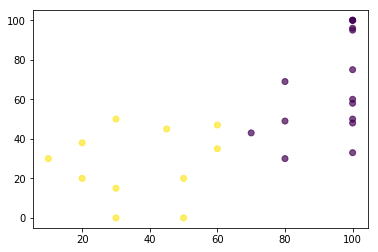

In [25]:
### 시각화 하기
plt.scatter(result['DB'],result["AND"], c=result["PREDICT"], alpha=0.7)

In [36]:
a = pd.read_csv("./dataset/customerdata.csv")
a.head()

,CUSTID,AVERAGEPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6.4,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4.0,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5.0,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6.6,0.900000,Early-bird
4,B10634,3391.074215,2,4.2,2.453656,Sleeping-dog


In [59]:
## 데이터 분리

### 기본정보 가지고 있기
name = a[["CUSTID"]]
### 특성정보 분리
features = a[["DEVICECOUNT","PRODUCTAGE"]]
features.head()

,DEVICECOUNT,PRODUCTAGE
0,6.4,1.679181
1,4.0,2.682023
2,5.0,3.208202
3,6.6,0.900000
4,4.2,2.453656


In [60]:
### 모델선언 및 feature 만 활용하여 자율학습 예측
model = KMeans(n_clusters=2, algorithm="auto")
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]
### name, feature, predict 붙이기
result = pd.concat([name, features, predict], axis = 1)
result.head()

,CUSTID,DEVICECOUNT,PRODUCTAGE,PREDICT
0,A13566,6.4,1.679181,1
1,A14219,4.0,2.682023,0
2,A15312,5.0,3.208202,0
3,A16605,6.6,0.900000,1
4,B10634,4.2,2.453656,0


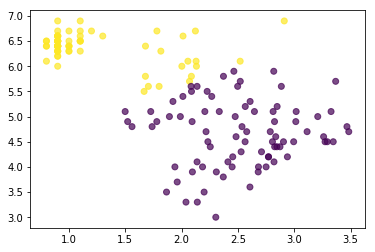

In [62]:
### 시각화 하기
plt.scatter(result['PRODUCTAGE'],result["DEVICECOUNT"], c=result["PREDICT"], alpha=0.7)